<a href="https://colab.research.google.com/github/grizzler88/Springboard/blob/master/Capstone%20-%20Fantasy%20Draft%20Strategy/FantasyNFL_Capstone_Modelling_(FINAL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 1: Fantasy NFL (Modelling)

The next step for my Capstone project is to take my data from the preprocessing stage and use it to test out a number of models to see which performs best.

## Getting Started

### Import packages & load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
#X_train_df = pd.read_csv('X_train_df.csv')
#df.head()

### Review & Transform Data

#### Drop Columns

Data has unnamed column 'Unnamed: 0' from import that is not of value and should be removed. 

In [3]:
#X_train.head()
#X_test.head()
#y_train.head()
#y_test.head()
#X_train_df.head()

In [4]:
X_train = X_train.drop(columns='Unnamed: 0')
X_test = X_test.drop(columns='Unnamed: 0')
y_train = y_train.drop(columns='Unnamed: 0')
y_test = y_test.drop(columns='Unnamed: 0')
#X_train_df = X_train_df.drop(columns='Unnamed: 0')

In [5]:
#X_train.head()
#X_test.head()
#y_train.head()
#y_test.head()
#X_train_df.head()

#### Turn Data into Arrays

Transform datasets into numpy arrays to allow them be used in modelling.

In [6]:
X_cols = list(X_train.columns)
#X_cols 

In [7]:
#X_train = np.array(X_train)
#X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16807, 19)
(5603, 19)
(16807,)
(5603,)


## The Models

'FAN_ACTUAL' is the target variable of this analysis and is a continuous variable - for this reason we will be focused on Regression models.

With the above in mind, we have selected four regression models to use on our data:

1.   Linear Regression
2.   SGD Regressor
3.   ElasticNet
4.   Random Forest Regression

In this section, we will introduce the models before looking to looking to fine tune them in the following sections.
we will begin with simple regression models and look to expand on this once we get a sense of how the model is performing.

### Linear Regression

We will begin with an Ordinary least squares (OLS) regression. OLS is a linear model that is fitted by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.

We will initially run this model using StatsModel package - as this provides a clearer summary of performance - and then run the final model on sklearn.

#### StatsModel OLS (Model 1)

For our initial model, we will use an OLS using StatsModel's OLS function. This provides us with some interesting results:

* R-squared = 0.364 
   * This suggest that the model currently explains 36.4% of the variance in our target variable 'FAN_ACTUAL'
   * This drops slightly to 0.363 when we look R-squared adjusted which may suggest that some of the independent variable / features are not contributed to the model as hoped


* F-statistic is significant 
  * This allows us to can reject the null that the coefficients in model are 0 and do not imporve the model's fit

* Durbin-Watson of 2.047 
  * Suggests the model does not suffer from Autocorrelation

* Skew (1.12) and Kurtosis (5.82)
  * This indicates that there is positive / right-hand skew to the data with outliers. This agrees with what we found out during our EDA.

* Coefficients
  * Large number of features are considered significant at 5% level including:   
    * 'FAN_AVG', 'PASSCOMP_AVG', 'PASSYDS_300_AVG', 'RUSHATT_AVG', 'RUSHTD_AVG', 'FUMLST_AVG', 'TGTS_AVG', 'RECTD_AVG', 'RECTD_AVG', 'WIN/TIE_AVG', 'OPP_PTS_AGT_AVG', 'HOME', 'GRASS' (4.8%), 'POS_WR', 'MONTH_September'
  * Some coefficients were not considered signicant including:
    * 'DOME', 'SUNDAY', 'POS_TE', 'TIME_Night', 'TIME_Noon' 

* Mean Squared Error is 40.85



In [9]:
import statsmodels.api as sm

X_train_OLS = pd.DataFrame(X_train, columns=X_cols)
X_train_OLS = sm.add_constant(X_train_OLS)

OLS = sm.OLS(y_train, X_train_OLS)
OLS = OLS.fit()

print(OLS.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     504.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:13:34   Log-Likelihood:                -55023.
No. Observations:               16807   AIC:                         1.101e+05
Df Residuals:                   16787   BIC:                         1.102e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.0974      0.258     

In [10]:
y_pred = OLS.predict(X_train_OLS)

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

OLS_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
OLS_mae = mean_absolute_error(y_train, y_pred)
OLS_R2 = r2_score(y_train, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_train, y_pred),),2))
print('MAE :', round(mean_absolute_error(y_train, y_pred), 2))
print('R2 :', round(r2_score(y_train, y_pred), 3))

RMSE : 6.39
MAE : 4.65
R2 : 0.364


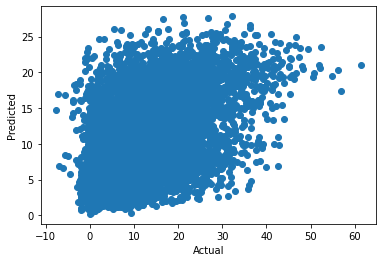

In [12]:
_ = plt.scatter(x=y_train, y=y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')

plt.show()

#### StatsModel OLS (Model 2)

I repeated the OLS model but removed the non-significant features from the model to understand how this would impact on the model. This created the following result:

* All coefficients are significant at 5% level

* R-squared has dropped slightly to 0.363

* Mean-squared error has increased to 40.85

As both the R-squared and the MSE performed slightly worse in this model, we will not continue with this feature set going forward. 

In [13]:
X_train_OLS = X_train_OLS.drop(columns=['DOME', 'SUNDAY', 'POS_TE', 'TIME_Night', 'TIME_Noon'])
X_train_OLS = sm.add_constant(X_train_OLS)

OLS = sm.OLS(y_train, X_train_OLS)
OLS = OLS.fit()

print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     685.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:13:35   Log-Likelihood:                -55025.
No. Observations:               16807   AIC:                         1.101e+05
Df Residuals:                   16792   BIC:                         1.102e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.1293      0.106     

In [14]:
y_pred = OLS.predict(X_train_OLS)

In [15]:
OLS_rmse_2 = np.sqrt(mean_squared_error(y_train, y_pred))
OLS_mae_2 = mean_absolute_error(y_train, y_pred)
OLS_R2_2 = r2_score(y_train, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_train, y_pred),),2))
print('MAE :', round(mean_absolute_error(y_train, y_pred), 2))
print('R2 :', round(r2_score(y_train, y_pred), 3))

RMSE : 6.39
MAE : 4.65
R2 : 0.363


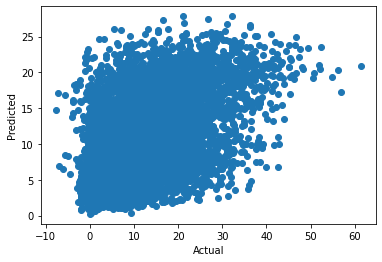

In [16]:
_ = plt.scatter(x=y_train, y=y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')

plt.show()

#### Skearn Linear Regression

Finally, we will apply this linear regression using sklearn. This is the same OLS estimator as StatsModel but does not give as detail a summary table as available there.

Running the model below shows the estimator gets the same R-squared and MSE as our intial model.

In [17]:
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

#y_pred = lm_model.predict(X_train)

#lm_mse = mean_squared_error(y_train, y_pred)
#lm_r2 = r2_score(y_train, y_pred)

#print('R-squared :', round(r2_score(y_train, y_pred), 2))
#print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = lm_model.predict(X_train)

#### Results

In [19]:
lm_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
lm_mae = mean_absolute_error(y_train, y_pred)
lm_r2 = r2_score(y_train, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_train, y_pred),),2))
print('MAE :', round(mean_absolute_error(y_train, y_pred), 2))
print('R2 :', round(r2_score(y_train, y_pred), 3))

RMSE : 6.39
MAE : 4.65
R2 : 0.364


In [20]:
from sklearn.model_selection import cross_val_score

lm_cv_rmse = cross_val_score(lm_model, X_train ,y_train ,cv=5 ,scoring='neg_root_mean_squared_error')
lm_cv_mae = cross_val_score(lm_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_absolute_error')
lm_cv_r2 = cross_val_score(lm_model, X_train ,y_train ,cv=5 ,scoring='r2')

lm_cv_rmse_score = abs(lm_cv_rmse.mean())
lm_cv_mae_score = abs(lm_cv_mae.mean())
lm_cv_r2_score = abs(lm_cv_r2.mean())

print('RMSE (CV mean) :', round(lm_cv_rmse_score, 2))
print('MAE (CV mean) :', round(lm_cv_mae_score, 2))
print('R2 (CV mean) :', round(lm_cv_r2_score, 3))

RMSE (CV mean) : 6.4
MAE (CV mean) : 4.66
R2 (CV mean) : 0.361


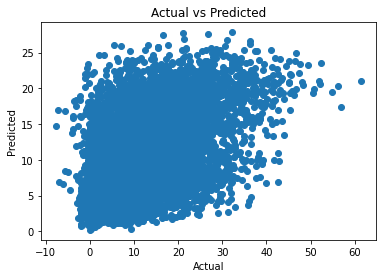

In [21]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

### SGD Regressor

Next I will look to apply a Stochastic Gradient Descent (SGD) Regressor model to the data. 

This is a linear model that is fitted by minimizing a regularized empirical loss with SGD - the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

In [22]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(random_state=42)
sgd_model.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [23]:
y_pred = sgd_model.predict(X_train)

In [24]:
sgd_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
sgd_mae = mean_absolute_error(y_train, y_pred)
sgd_r2 = r2_score(y_train, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_train, y_pred),),2))
print('MAE :', round(mean_absolute_error(y_train, y_pred), 2))
print('R2 :', round(r2_score(y_train, y_pred), 3))

RMSE : 6.39
MAE : 4.64
R2 : 0.363


In [25]:
sgd_cv_rmse = cross_val_score(sgd_model, X_train ,y_train ,cv=5 ,scoring='neg_root_mean_squared_error')
sgd_cv_mae = cross_val_score(sgd_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_absolute_error')
sgd_cv_r2 = cross_val_score(sgd_model, X_train ,y_train ,cv=5 ,scoring='r2')

sgd_cv_rmse_score = abs(sgd_cv_rmse.mean())
sgd_cv_mae_score = abs(sgd_cv_mae.mean())
sgd_cv_r2_score = abs(sgd_cv_r2.mean())

print('RMSE (CV mean) :', round(sgd_cv_rmse_score, 2))
print('MAE (CV mean) :', round(sgd_cv_mae_score, 2))
print('R2 (CV mean) :', round(sgd_cv_r2_score, 3))

RMSE (CV mean) : 6.41
MAE (CV mean) : 4.66
R2 (CV mean) : 0.358


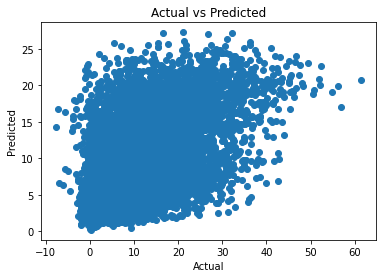

In [26]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

### ElasticNet

ElasticNet is a linear regression model trained with both l1 and l2
-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of l1 and l2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

We will start building this model using a simple ElasticNet model with no tuning of hyperparameters. This performs worse than our previous Linear and SGD models with a higher MSE and R-squared.

In [27]:
from sklearn.linear_model import ElasticNet

en_model = ElasticNet(random_state=42)
en_model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
y_pred = en_model.predict(X_train)

In [29]:
en_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
en_mae = mean_absolute_error(y_train, y_pred)
en_r2 = r2_score(y_train, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_train, y_pred),),2))
print('MAE :', round(mean_absolute_error(y_train, y_pred), 2))
print('R2 :', round(r2_score(y_train, y_pred), 3))

RMSE : 6.68
MAE : 5.03
R2 : 0.305


In [30]:
en_cv_rmse = cross_val_score(en_model, X_train ,y_train ,cv=5 ,scoring='neg_root_mean_squared_error')
en_cv_mae = cross_val_score(en_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_absolute_error')
en_cv_r2 = cross_val_score(en_model, X_train ,y_train ,cv=5 ,scoring='r2')

en_cv_rmse_score = abs(en_cv_rmse.mean())
en_cv_mae_score = abs(en_cv_mae.mean())
en_cv_r2_score = abs(en_cv_r2.mean())

print('RMSE (CV mean) :', round(en_cv_rmse_score, 2))
print('MAE (CV mean) :', round(en_cv_mae_score, 2))
print('R2 (CV mean) :', round(en_cv_r2_score, 3))

RMSE (CV mean) : 6.68
MAE (CV mean) : 5.03
R2 (CV mean) : 0.304


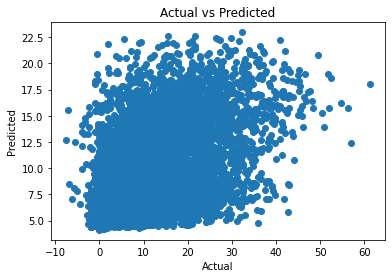

In [31]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

### Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

We will begin with a simple Random Forest. This initially shows fantastic results with an MSE of 6.17 and R-squared of 90%, however this initial view is prone to overfitting of the data. When we apply cross-validation of the model for MSE, we see this 44.25 - showing this model still needs a bit of work to generalise better.

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [33]:
y_pred = rf_model.predict(X_train)

In [34]:
rf_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rf_mae = mean_absolute_error(y_train, y_pred)
rf_r2 = r2_score(y_train, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_train, y_pred),),2))
print('MAE :', round(mean_absolute_error(y_train, y_pred), 2))
print('R2 :', round(r2_score(y_train, y_pred), 3))

RMSE : 2.48
MAE : 1.81
R2 : 0.904


In [35]:
rf_cv_rmse = cross_val_score(rf_model, X_train ,y_train ,cv=5 ,scoring='neg_root_mean_squared_error')
rf_cv_mae = cross_val_score(rf_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_absolute_error')
rf_cv_r2 = cross_val_score(rf_model, X_train ,y_train ,cv=5 ,scoring='r2')

rf_cv_rmse_score = abs(rf_cv_rmse.mean())
rf_cv_mae_score = abs(rf_cv_mae.mean())
rf_cv_r2_score = abs(rf_cv_r2.mean())

print('RMSE (CV mean) :', round(rf_cv_rmse_score, 2))
print('MAE (CV mean) :', round(rf_cv_mae_score, 2))
print('R2 (CV mean) :', round(rf_cv_r2_score, 3))

RMSE (CV mean) : 6.65
MAE (CV mean) : 4.9
R2 (CV mean) : 0.31


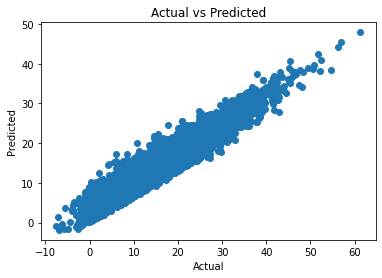

In [36]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

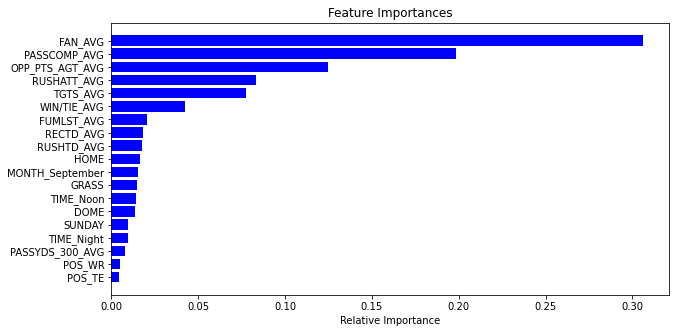

           Features  Importance scores
0           FAN_AVG           0.305989
1      PASSCOMP_AVG           0.198201
9   OPP_PTS_AGT_AVG           0.124853
3       RUSHATT_AVG           0.083164
6          TGTS_AVG           0.077321
8       WIN/TIE_AVG           0.042529
5        FUMLST_AVG           0.020503
7         RECTD_AVG           0.018214
4        RUSHTD_AVG           0.017907
10             HOME           0.016773
16  MONTH_September           0.015244
12            GRASS           0.014687
18        TIME_Noon           0.014479
11             DOME           0.013750
13           SUNDAY           0.009670
17       TIME_Night           0.009445
2   PASSYDS_300_AVG           0.007963
15           POS_WR           0.004894
14           POS_TE           0.004412


In [37]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

imp_table = pd.DataFrame(list(zip(features,importances)),columns =['Features', 'Importance scores'])
imp_table = imp_table.sort_values(by='Importance scores', ascending=False)
print(imp_table)

### Review Performance

Finally we will review how each model performed. We do this using three evaluation metrics:
* Root Mean Square Error - standard deviation of distance between prediction and observed value
* Mean Absolute Error - the average absolute distance between prediction and observed value
* R-squared - explains how well models explain variablity of dependent variable (fantasy points)

For each of these metrics, we will see how the model performed on all training data and with cross-validation on training data.

Overall, it shows that Random Forest is the best model on all training data (as it seems to have overfitted) but is 3rd best when we look at CV scores across all metrics. Linear regression model is best when we look at CV results.

In [38]:
model_names = ['Linear', 'SGD', 'ElasticNet', 'Random Forest']
model_rmse = [lm_rmse, sgd_rmse, en_rmse, rf_rmse]
model_rmse_cv = [lm_cv_rmse_score, sgd_cv_rmse_score, en_cv_rmse_score, rf_cv_rmse_score]
model_mae = [lm_mae, sgd_mae, en_mae, rf_mae]
model_mae_cv = [lm_cv_mae_score, sgd_cv_mae_score, en_cv_mae_score, rf_cv_mae_score]
model_r2 = [lm_r2, sgd_r2, en_r2, rf_r2]
model_r2_cv = [lm_cv_r2_score, sgd_cv_r2_score, en_cv_r2_score, rf_cv_r2_score]

In [39]:
rmse_performance = pd.DataFrame(list(zip(model_names, model_rmse, model_rmse_cv)), columns=['Model', 'Score', 'CV Score'])

In [40]:
rmse_performance.sort_values(by='Score')

,Model,Score,CV Score
3,Random Forest,2.483549,6.651512
0,Linear,6.391073,6.402013
1,SGD,6.394132,6.413925
2,ElasticNet,6.680785,6.681879


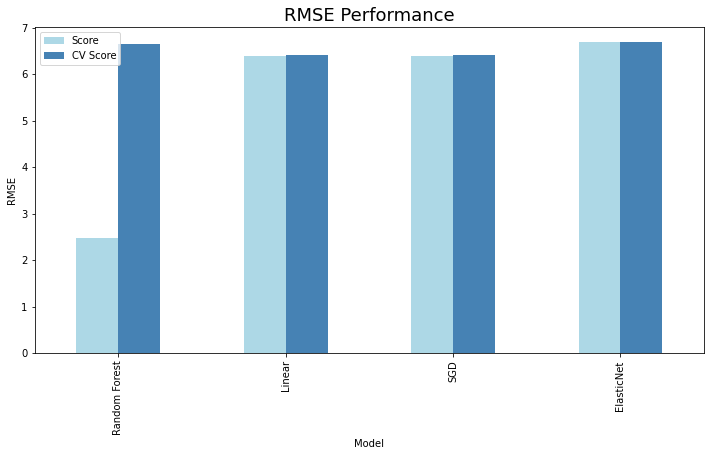

In [41]:
rmse_performance = rmse_performance.sort_values(by='Score')

#_ = plt.figure(figsize=(20,10))
_ = rmse_performance.plot(x='Model', y=['Score', 'CV Score'], kind='bar', figsize=(12,6), color=['lightblue', 'steelblue'])
_ = plt.legend(loc='upper left')
_ = plt.ylabel('RMSE')
_ = plt.title('RMSE Performance', fontsize=18)

plt.show()

In [42]:
mae_performance = pd.DataFrame(list(zip(model_names, model_mae, model_mae_cv)), columns=['Model', 'Score', 'CV Score'])

In [43]:
mae_performance.sort_values(by='Score')

,Model,Score,CV Score
3,Random Forest,1.813522,4.904773
1,SGD,4.644953,4.658239
0,Linear,4.650859,4.658545
2,ElasticNet,5.030318,5.031389


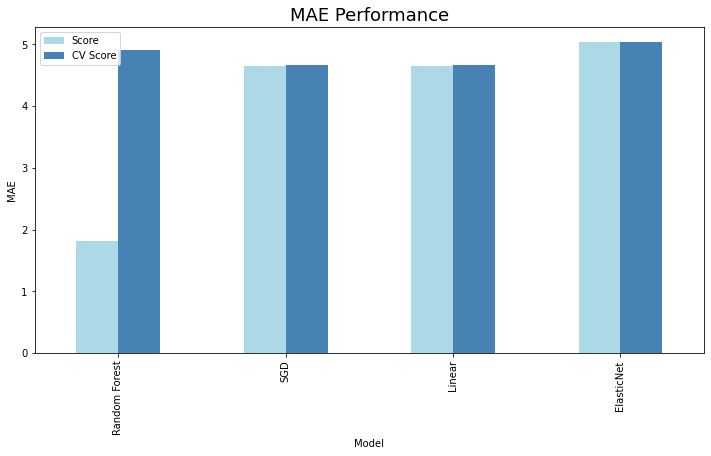

In [44]:
mae_performance = mae_performance.sort_values(by='Score')

_ = mae_performance.plot(x='Model', y=['Score', 'CV Score'], kind='bar', figsize=(12,6), color=['lightblue', 'steelblue'])
_ = plt.legend(loc='upper left')
_ = plt.ylabel('MAE')
_ = plt.title('MAE Performance', fontsize=18)

plt.show()

In [45]:
r2_performance = pd.DataFrame(list(zip(model_names, model_r2, model_r2_cv)), columns=['Model', 'Score', 'CV Score'])

In [46]:
r2_performance.sort_values(by='Score', ascending=False)

,Model,Score,CV Score
3,Random Forest,0.903896,0.309853
0,Linear,0.363580,0.360828
1,SGD,0.362970,0.358423
2,ElasticNet,0.304573,0.303839


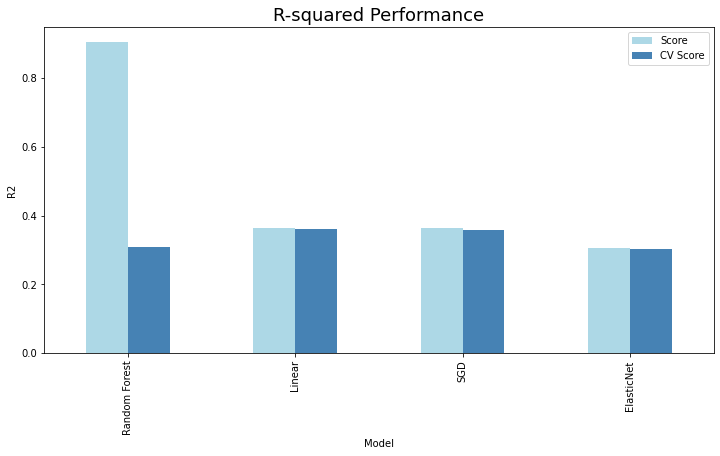

In [47]:
r2_performance = r2_performance.sort_values(by='Score', ascending=False)

_ = r2_performance.plot(x='Model', y=['Score', 'CV Score'], kind='bar', figsize=(12,6), color=['lightblue', 'steelblue'])
_ = plt.legend(loc='upper right')
_ = plt.ylabel('R2')
_ = plt.title('R-squared Performance', fontsize=18)

plt.show()

In the previous section, we developed our models to find the optimal for Linear, SGD Regrossor, ElasticNet and Random Forest Regressor. Following this, we found out the following:
* Training Data (Without Cross-Validation): Random Forest is the best model by significant margin over the other models in regards MSE and R-squared
* Training Data (With Cross-Validation): Random Forest is the worst performing model in relation to MSE, with the other three models performing roughly the same
* Test Data: Random Forest flips and becomes the best performing model - performing at a similar level to that as with Training data (with cross-validation). The three other models did not generalise as well to the test data with slightly higher MSE.


## Tuning the Hyperparameters

Hyperparameters are the parameters for each model that are manually set ahead of fitting the model. 

In the previous section, we used the default hyperparameters for each model. However, this is not the ideal approach as the optimal hyperparmaters for each model will vary depending on the data set.

In the coming sections, we will idenfify a number of important hyperparameters for each model that we will look to tune using RandomisedSearchCV and GridSearchCV from sklearn.model_selection.

### SGD Regressor

The last SGD model was fitted with default values used for the majority of the parameters. With the aim of improving the performance of this model, I will look to use cross-validation to test out the performance of the model across several parameters including:
* Loss function
* Regularisation penalty
* Regularisation value (alpha)
* Learning rate
* Initial Learning Rate

However, despite this hyperparameter tuning, there is little improvement in performance with MSE and R-squared remaining at similar levels.


In [48]:
loss = ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
eta0 = [0.01, 0.1, 1, 10, 100]

param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           eta0=eta0)

In [49]:
from sklearn.model_selection import RandomizedSearchCV

sgdcv_model = RandomizedSearchCV(estimator=sgd_model,
                            param_distributions=param_distributions,
                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1,
                            n_iter=1000, random_state=42)
sgdcv_model.fit(X_train, y_train)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=42,
                                          shuffle=True, tol=0.001,
                                          validation_fraction=0.1, verbose=0,
                                          warm_...
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000],
                                        'e

In [50]:
print('Best MSE Score: ', round(abs(sgdcv_model.best_score_), 2))
print('Best Params: ', sgdcv_model.best_params_)

Best MSE Score:  40.99
Best Params:  {'penalty': 'l1', 'loss': 'squared_loss', 'learning_rate': 'adaptive', 'eta0': 0.01, 'alpha': 0.01}


In [51]:
y_pred = sgdcv_model.predict(X_train)

sgdcv_mse = mean_squared_error(y_train, y_pred)
sgdcv_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.36
Mean Squared Error : 40.85


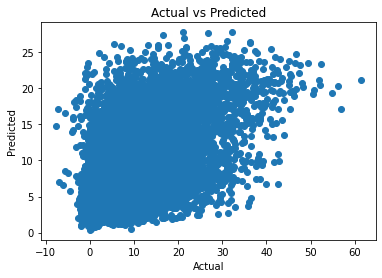

In [52]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

### ElasticNet

The last ElasticNet model was fitted with default values used for the majority of the parameters. With the aim of improving the performance of this model, I will look to use cross-validation to test out the performance of the model across several parameters including:
* Regularisation penalty mixing value (l1_ratios)
* Regularisation penalty constant value (alpha)


This finds the optimal SGD model for this data and improves performance marginally - with the MSE score up to 40.85 (from 44.63) and R-squared to 36% (from 30%). 

These scores are nearly exactly the same as our SGD Regressor with CV.

In [53]:
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

param_grid = dict(l1_ratios=l1_ratios, alphas=alphas)

In [54]:
from sklearn.linear_model import ElasticNetCV

encv_model = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=5, max_iter=10000, random_state=42)
encv_model.fit(X_train, y_train)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1], copy_X=True,
             cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
             verbose=0)

In [55]:
print('Best Alpha: ', encv_model.alpha_)
print('Best L1 ratio: ', encv_model.l1_ratio_)
#print(encv_model.intercept_)
#print(encv_model.coef_)
#print(encv_model.mse_path_)
#print(encv_model.alphas_)

Best Alpha:  0.01
Best L1 ratio:  1.0


In [56]:
y_pred = encv_model.predict(X_train)

encv_mse = mean_squared_error(y_train, y_pred)
encv_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 3))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.363
Mean Squared Error : 40.85


In [57]:
cv_scores_train= cross_val_score(encv_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_squared_error')

#print(cv_scores_train)
print('Mean Squared Error (CV mean) :', round(abs(cv_scores_train.mean()), 2))
print('Mean Squared Error (CV STD) :', round(cv_scores_train.std(), 2))

encv_mse_cv = cv_scores_train.mean()

Mean Squared Error (CV mean) : 40.99
Mean Squared Error (CV STD) : 1.35


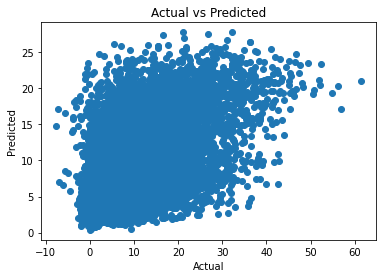

In [58]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

### Random Forest

To tune the model, we will look at three areas:
* Number of estimators
* Depth of decision trees
* Number of features per decision tree

Applying this show that the best results are found using 1,000 estimators at a max depth of 10 and using square root of the total number of features in dataset per decision tree.

Doing this improved the performance to 32.05 MSE and R-squared of 50%. However, we still need to see if this generalises which we will test in next section.

In [59]:
param_grid = {  'n_estimators': [100, 500, 1000],
                'max_depth': [3, 5, 10],
                'max_features': ['auto', 'sqrt'],
                'criterion': ['mse']
             }


In [60]:
from sklearn.model_selection import GridSearchCV

rfcv_model = GridSearchCV(rf_model,
                            param_grid, cv=5,
                            scoring='neg_mean_squared_error', n_jobs=-1)
rfcv_model = rfcv_model.fit(X_train, y_train)


In [61]:
print('Best Score: ', rfcv_model.best_score_)
print('Best Params: ', rfcv_model.best_params_)
print('Best Model: ', rfcv_model.best_estimator_)

Best Score:  -41.43974424992231
Best Params:  {'criterion': 'mse', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}
Best Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


In [62]:
y_pred = rfcv_model.predict(X_train)

rfcv_mse = mean_squared_error(y_train, y_pred)
rfcv_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.5
Mean Squared Error : 32.05


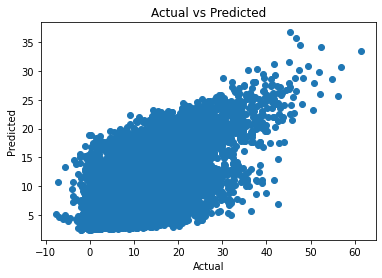

In [63]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

In [64]:
#rfcv_model.cv_results_

## Training Data Evaluation

Now that we have tuned our hyperparameters to optimise each model, we will look to apply these models to our training data so see how they perform. We will do this in two ways:
1. Apply each model to complete training data
2. Apply each model using 5-fold cross-validation of training data

For each of these approaches we will be looking at three different evaluation metrics:
1.	Root mean squared error (RMSE): This represents the sample standard deviation of difference predicted values and observed values
2.	Mean absolute error (MAE): This represents the average absolute difference between the predicted values and the observed values
3.	R-Squared (R2): This shows how well features in model explain the variability in our target variable (fantasy points)


### Optimal SGD Regressor

We will run the SGD regressor again but this time with the optimal hyperparameters set out in the previous section, and then fit this model on our training data.

Following this, we will generate predicted values for fantasy points (y_pred) and use these to calculate our evaluation metrics for the overall training data.

Lastly, we will use the cross_val_score to cross-validate these results on the training data using 5-folds.

In [65]:
sgd_opt_model = SGDRegressor(penalty='l1', loss='squared_loss', learning_rate='adaptive', eta0=0.01, alpha=0.01, random_state=42)
sgd_opt_model.fit(X_train, y_train)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [66]:
y_pred = sgd_opt_model.predict(X_train)

In [67]:
sgd_opt_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
sgd_opt_mae = mean_absolute_error(y_train, y_pred)
sgd_opt_r2 = r2_score(y_train, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_train, y_pred),),2))
print('MAE :', round(mean_absolute_error(y_train, y_pred), 2))
print('R2 :', round(r2_score(y_train, y_pred), 3))

RMSE : 6.39
MAE : 4.66
R2 : 0.363


In [68]:
sgd_opt_cv_rmse = cross_val_score(sgd_opt_model, X_train ,y_train ,cv=5 ,scoring='neg_root_mean_squared_error')
sgd_opt_cv_mae = cross_val_score(sgd_opt_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_absolute_error')
sgd_opt_cv_r2 = cross_val_score(sgd_opt_model, X_train ,y_train ,cv=5 ,scoring='r2')

sgd_opt_cv_rmse_score = abs(sgd_cv_rmse.mean())
sgd_opt_cv_mae_score = abs(sgd_cv_mae.mean())
sgd_opt_cv_r2_score = abs(sgd_cv_r2.mean())

print('RMSE (CV mean) :', round(sgd_opt_cv_rmse_score, 2))
print('MAE (CV mean) :', round(sgd_opt_cv_mae_score, 2))
print('R2 (CV mean) :', round(sgd_opt_cv_r2_score, 3))

RMSE (CV mean) : 6.41
MAE (CV mean) : 4.66
R2 (CV mean) : 0.358


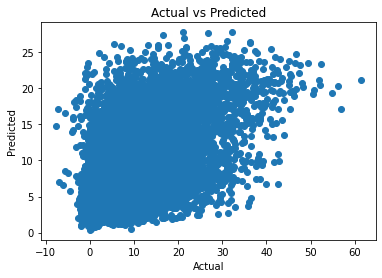

In [69]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

### Optimal ElasticNet

We will run the ElasticNet model again but this time with the optimal hyperparameters set out in the previous section, and then fit this model on our training data.

Following this, we will generate predicted values for fantasy points (y_pred) and use these to calculate our evaluation metrics for the overall training data.

Lastly, we will use the cross_val_score to cross-validate these results on the training data using 5-folds

In [70]:
en_opt_model = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

en_opt_model.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
y_pred = en_opt_model.predict(X_train)

In [72]:
en_opt_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
en_opt_mae = mean_absolute_error(y_train, y_pred)
en_opt_r2 = r2_score(y_train, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_train, y_pred),),2))
print('MAE :', round(mean_absolute_error(y_train, y_pred), 2))
print('R2 :', round(r2_score(y_train, y_pred), 3))

RMSE : 6.39
MAE : 4.65
R2 : 0.363


In [73]:
en_opt_cv_rmse = cross_val_score(en_opt_model, X_train ,y_train ,cv=5 ,scoring='neg_root_mean_squared_error')
en_opt_cv_mae = cross_val_score(en_opt_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_absolute_error')
en_opt_cv_r2 = cross_val_score(en_opt_model, X_train ,y_train ,cv=5 ,scoring='r2')

en_opt_cv_rmse_score = abs(en_cv_rmse.mean())
en_opt_cv_mae_score = abs(en_cv_mae.mean())
en_opt_cv_r2_score = abs(en_cv_r2.mean())

print('RMSE (CV mean) :', round(en_opt_cv_rmse_score, 2))
print('MAE (CV mean) :', round(en_opt_cv_mae_score, 2))
print('R2 (CV mean) :', round(en_opt_cv_r2_score, 3))

RMSE (CV mean) : 6.68
MAE (CV mean) : 5.03
R2 (CV mean) : 0.304


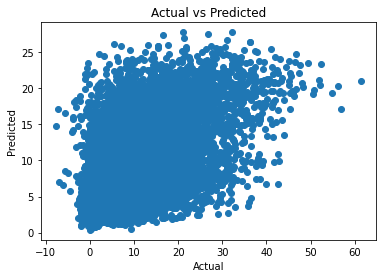

In [74]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

### Optimal Random Forest Model

We will run the Random Forest model again but this time with the optimal hyperparameters set out in the previous section, and then fit this model on our training data.

Following this, we will generate predicted values for fantasy points (y_pred) and use these to calculate our evaluation metrics for the overall training data.

Lastly, we will use the cross_val_score to cross-validate these results on the training data using 5-folds.

In [75]:
rf_opt_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

rf_opt_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [76]:
y_pred = rf_opt_model.predict(X_train)

In [77]:
rf_opt_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rf_opt_mae = mean_absolute_error(y_train, y_pred)
rf_opt_r2 = r2_score(y_train, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_train, y_pred),),2))
print('MAE :', round(mean_absolute_error(y_train, y_pred), 2))
print('R2 :', round(r2_score(y_train, y_pred), 3))

RMSE : 5.66
MAE : 4.24
R2 : 0.501


In [78]:
rf_opt_cv_rmse = cross_val_score(rf_opt_model, X_train ,y_train ,cv=5 ,scoring='neg_root_mean_squared_error')
rf_opt_cv_mae = cross_val_score(rf_opt_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_absolute_error')
rf_opt_cv_r2 = cross_val_score(rf_opt_model, X_train ,y_train ,cv=5 ,scoring='r2')

rf_opt_cv_rmse_score = abs(rf_cv_rmse.mean())
rf_opt_cv_mae_score = abs(rf_cv_mae.mean())
rf_opt_cv_r2_score = abs(rf_cv_r2.mean())

print('RMSE (CV mean) :', round(rf_opt_cv_rmse_score, 2))
print('MAE (CV mean) :', round(rf_opt_cv_mae_score, 2))
print('R2 (CV mean) :', round(rf_opt_cv_r2_score, 3))

RMSE (CV mean) : 6.65
MAE (CV mean) : 4.9
R2 (CV mean) : 0.31


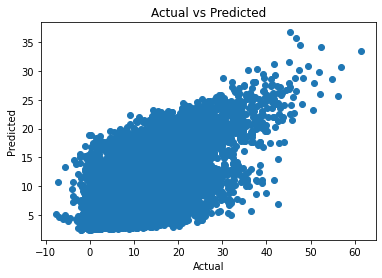

In [79]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

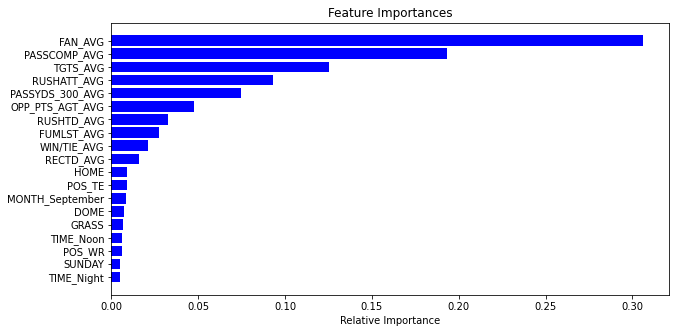

           Features  Importance scores
0           FAN_AVG           0.305913
1      PASSCOMP_AVG           0.193205
6          TGTS_AVG           0.125453
3       RUSHATT_AVG           0.093023
2   PASSYDS_300_AVG           0.074580
9   OPP_PTS_AGT_AVG           0.047499
4        RUSHTD_AVG           0.032549
5        FUMLST_AVG           0.027375
8       WIN/TIE_AVG           0.021320
7         RECTD_AVG           0.015940
10             HOME           0.009131
14           POS_TE           0.008972
16  MONTH_September           0.008561
11             DOME           0.007026
12            GRASS           0.006994
18        TIME_Noon           0.006248
15           POS_WR           0.006068
13           SUNDAY           0.005099
17       TIME_Night           0.005044


In [80]:
features = X_train.columns
importances = rf_opt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

imp_table = pd.DataFrame(list(zip(features,importances)),columns =['Features', 'Importance scores'])
imp_table = imp_table.sort_values(by='Importance scores', ascending=False)
print(imp_table)

### Results

Now that we have ran the optimal models and calculated their evaluation metrics, it is time to compare the models across each of these.


* Random Forest is the best model across all metrics using all training data but performance drops to 3rd overall once we use CV. This seems to indicate that the model overfitted to the training data.
* Linear model performs best across all metrics when looking at CV results,followed closely by SGD Regressor. There is little change between training and CV results that seems to indicate that these model are more biased / underfitted than other models.




In [81]:
model_names = ['Linear', 'SGD', 'ElasticNet', 'Random Forest']
model_rmse = [lm_rmse, sgd_opt_rmse, en_opt_rmse, rf_opt_rmse]
model_rmse_cv = [lm_cv_rmse_score, sgd_opt_cv_rmse_score, en_opt_cv_rmse_score, rf_opt_cv_rmse_score]
model_mae = [lm_mae, sgd_opt_mae, en_opt_mae, rf_opt_mae]
model_mae_cv = [lm_cv_mae_score, sgd_opt_cv_mae_score, en_opt_cv_mae_score, rf_opt_cv_mae_score]
model_r2 = [lm_r2, sgd_opt_r2, en_opt_r2, rf_opt_r2]
model_r2_cv = [lm_cv_r2_score, sgd_opt_cv_r2_score, en_opt_cv_r2_score, rf_opt_cv_r2_score]

In [82]:
rmse_opt_performance = pd.DataFrame(list(zip(model_names, model_rmse, model_rmse_cv)), columns=['Model', 'Score', 'CV Score'])

In [83]:
rmse_opt_performance.sort_values(by='Score')

,Model,Score,CV Score
3,Random Forest,5.661247,6.651512
0,Linear,6.391073,6.402013
2,ElasticNet,6.391599,6.681879
1,SGD,6.391639,6.413925


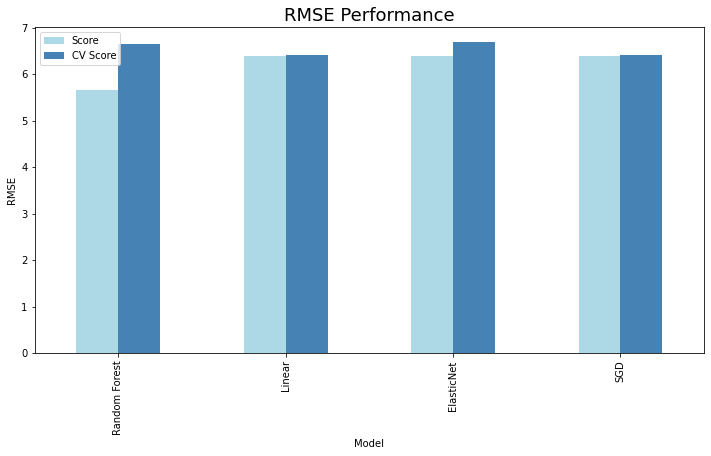

In [84]:
rmse_opt_performance = rmse_opt_performance.sort_values(by='Score')

#_ = plt.figure(figsize=(20,10))
_ = rmse_opt_performance.plot(x='Model', y=['Score', 'CV Score'], kind='bar', figsize=(12,6), color=['lightblue', 'steelblue'])
_ = plt.legend(loc='upper left')
_ = plt.ylabel('RMSE')
_ = plt.title('RMSE Performance', fontsize=18)

plt.show()

In [85]:
mae_opt_performance = pd.DataFrame(list(zip(model_names, model_mae, model_mae_cv)), columns=['Model', 'Score', 'CV Score'])

In [86]:
mae_opt_performance.sort_values(by='Score')

,Model,Score,CV Score
3,Random Forest,4.239611,4.904773
0,Linear,4.650859,4.658545
2,ElasticNet,4.654423,5.031389
1,SGD,4.655086,4.658239


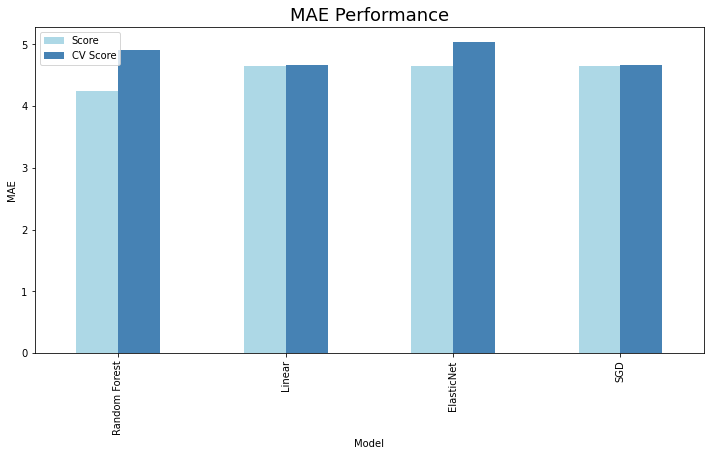

In [87]:
mae_opt_performance = mae_opt_performance.sort_values(by='Score')

#_ = plt.figure(figsize=(20,10))
_ = mae_opt_performance.plot(x='Model', y=['Score', 'CV Score'], kind='bar', figsize=(12,6), color=['lightblue', 'steelblue'])
_ = plt.legend(loc='upper left')
_ = plt.ylabel('MAE')
_ = plt.title('MAE Performance', fontsize=18)

plt.show()

In [88]:
r2_opt_performance = pd.DataFrame(list(zip(model_names, model_r2, model_r2_cv)), columns=['Model', 'Score', 'CV Score'])

In [89]:
r2_opt_performance.sort_values(by='Score', ascending=False)

,Model,Score,CV Score
3,Random Forest,0.500632,0.309853
0,Linear,0.363580,0.360828
2,ElasticNet,0.363475,0.303839
1,SGD,0.363467,0.358423


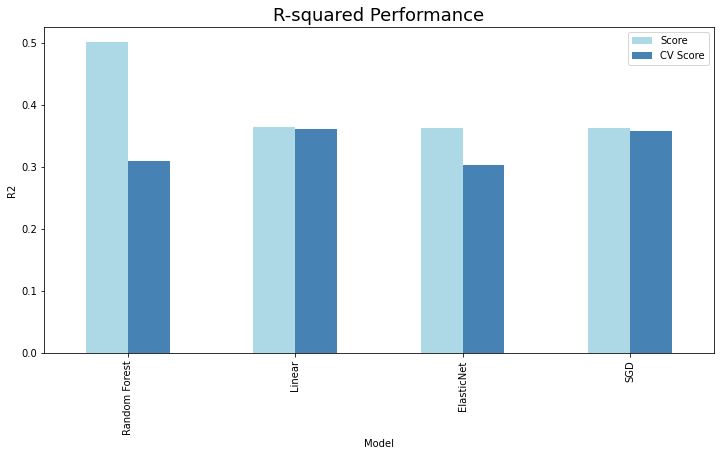

In [90]:
r2_opt_performance = r2_opt_performance.sort_values(by='Score', ascending=False)

_ = r2_opt_performance.plot(x='Model', y=['Score', 'CV Score'], kind='bar', figsize=(12,6), color=['lightblue', 'steelblue'])
_ = plt.legend(loc='upper right')
_ = plt.ylabel('R2')
_ = plt.title('R-squared Performance', fontsize=18)

plt.show()

## Test Data Evaluation

Finally, we will run our models and evaluate performance against our test data - which we've held out until this point to make our final evaluations.

### Run Models

In this section, we will create predictions for our test data and use these to calculate our evaluation metrics for final comparison.

In [91]:
y_pred = lm_model.predict(X_test)

lm_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lm_test_mae = mean_absolute_error(y_test, y_pred)
lm_test_r2 = r2_score(y_test, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print('MAE :', round(mean_absolute_error(y_test, y_pred), 2))
print('R-squared :', round(r2_score(y_test, y_pred), 2))

RMSE : 6.45
MAE : 4.69
R-squared : 0.35


In [92]:
y_pred = sgd_opt_model.predict(X_test)

sgd_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
sgd_test_mae = mean_absolute_error(y_test, y_pred)
sgd_test_r2 = r2_score(y_test, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print('MAE :', round(mean_absolute_error(y_test, y_pred), 2))
print('R-squared :', round(r2_score(y_test, y_pred), 2))

RMSE : 6.45
MAE : 4.69
R-squared : 0.35


In [93]:
y_pred = en_opt_model.predict(X_test)

en_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
en_test_mae = mean_absolute_error(y_test, y_pred)
en_test_r2 = r2_score(y_test, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print('MAE :', round(mean_absolute_error(y_test, y_pred), 2))
print('R-squared :', round(r2_score(y_test, y_pred), 2))

RMSE : 6.45
MAE : 4.69
R-squared : 0.35


In [94]:
y_pred = rf_opt_model.predict(X_test)

rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_test_mae = mean_absolute_error(y_test, y_pred)
rf_test_r2 = r2_score(y_test, y_pred)

print('RMSE :', round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print('MAE :', round(mean_absolute_error(y_test, y_pred), 2))
print('R-squared :', round(r2_score(y_test, y_pred), 2))

RMSE : 6.44
MAE : 4.71
R-squared : 0.35


### Results

Now, we will look to compare the results from our test data and there is not a lot to differentiate performance between each model.
* Random Forest performs best in relation to RMSE (by 0.01)
* Other models perform best in relation to MAE (by 0.02)
* All models score the same in relation to R-squared


In [95]:
model_names = ['Linear', 'SGD', 'ElasticNet', 'Random Forest']
model_rmse = [lm_test_rmse, sgd_test_rmse, en_test_rmse, rf_test_rmse]
model_mae = [lm_test_mae, sgd_test_mae, en_test_mae, rf_test_mae]
model_r2 = [lm_test_r2, sgd_test_r2, en_test_r2, rf_test_r2]


In [96]:
rmse_test_performance = pd.DataFrame(list(zip(model_names, model_rmse)), columns=['Model', 'Score'])

In [97]:
rmse_test_performance.sort_values(by='Score')

,Model,Score
3,Random Forest,6.435664
2,ElasticNet,6.446116
1,SGD,6.446165
0,Linear,6.446637


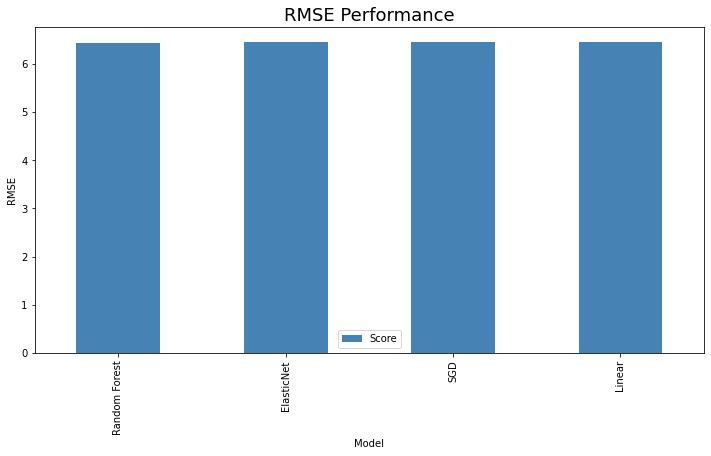

In [98]:
rmse_test_performance = rmse_test_performance.sort_values(by='Score')

#_ = plt.figure(figsize=(20,10))
_ = rmse_test_performance.plot(x='Model', y=['Score'], kind='bar', figsize=(12,6), color=['steelblue'])
_ = plt.legend()
_ = plt.ylabel('RMSE')
_ = plt.title('RMSE Performance', fontsize=18)

plt.show()

In [99]:
mae_test_performance = pd.DataFrame(list(zip(model_names, model_mae)), columns=['Model', 'Score'])

In [100]:
mae_test_performance.sort_values(by='Score')

,Model,Score
0,Linear,4.689470
2,ElasticNet,4.691144
1,SGD,4.691818
3,Random Forest,4.714211


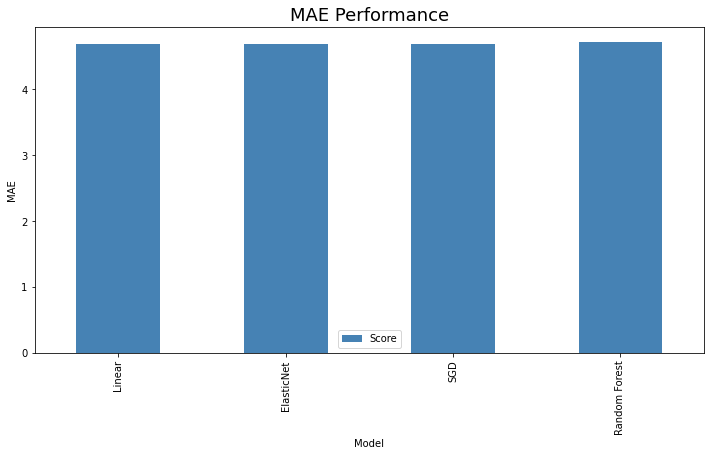

In [101]:
mae_test_performance = mae_test_performance.sort_values(by='Score')

#_ = plt.figure(figsize=(20,10))
_ = mae_test_performance.plot(x='Model', y=['Score'], kind='bar', figsize=(12,6), color=['steelblue'])
_ = plt.legend()
_ = plt.ylabel('MAE')
_ = plt.title('MAE Performance', fontsize=18)

plt.show()

In [102]:
r2_test_performance = pd.DataFrame(list(zip(model_names, model_r2)), columns=['Model', 'Score'])

In [103]:
r2_test_performance.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.353910
2,ElasticNet,0.351810
1,SGD,0.351800
0,Linear,0.351705


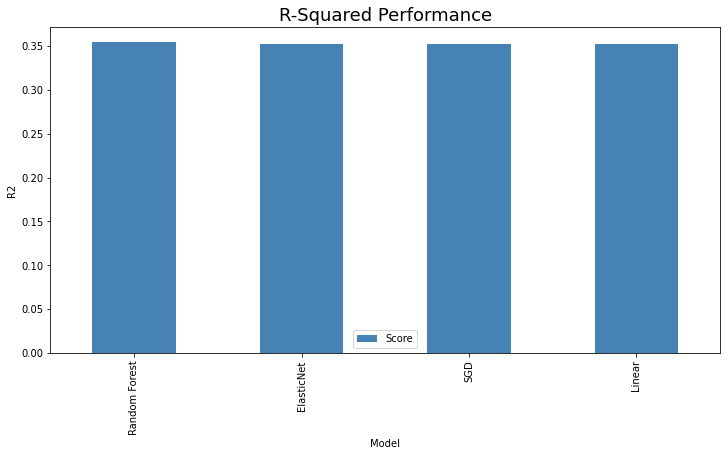

In [104]:
r2_test_performance = r2_test_performance.sort_values(by='Score', ascending=False)

#_ = plt.figure(figsize=(20,10))
_ = r2_test_performance.plot(x='Model', y=['Score'], kind='bar', figsize=(12,6), color=['steelblue'])
_ = plt.legend()
_ = plt.ylabel('R2')
_ = plt.title('R-Squared Performance', fontsize=18)

plt.show()

## Final Comparison

In this section, I bring together all the results of models from training data, training data (with CV), and test data to give an overall view of performance and make a final decision on the model to proceed with.

As indicated in our test data section, there is little to differentiate between the performance of each model. Our choice comes down to two factors:
* Which metric is deemed best fit for our data?
* What would be prefer - higher bias or higher variance model?

On the first question, RMSE will penalise higher differences between predicted and actual values – and  this something we want to minimise when predicting fantasy points – this is the metric we will concentrate on for our model decision.

On the second, while Random Forest did not generalise as well on cross-validation as Linear and SGD models, it did perform the same on test data so this may not be as big a concern as first imagined as all models seem to generalise at an equal rate.

With this in mind, it seems Random Forest will be the model selected to go forward with due to it's slightly better RMSE performance. However, it is important to note that there is no oorrect answer here given how closely all the models performed.


### RMSE

In [105]:
model_names = ['Linear', 'SGD', 'ElasticNet', 'Random Forest', 'Linear', 'SGD', 'ElasticNet', 'Random Forest', 'Linear', 'SGD', 'ElasticNet', 'Random Forest']
data_type = ['Train', 'Train', 'Train', 'Train', 'Train (with CV)', 'Train (with CV)', 'Train (with CV)', 'Train (with CV)', 'Test', 'Test', 'Test', 'Test']
model_rmse = [round(lm_rmse, 2), round(sgd_opt_rmse, 2), round(en_opt_rmse, 2), round(rf_opt_rmse, 2), round(abs(lm_cv_rmse_score), 2), round(abs(sgd_opt_cv_rmse_score), 2), round(abs(en_opt_cv_rmse_score), 2), round(abs(rf_opt_cv_rmse_score), 2), round(lm_test_rmse, 2), round(sgd_test_rmse, 2), round(en_test_rmse, 2), round(rf_test_rmse, 2)]

In [106]:
overall_rmse_df = pd.DataFrame(list(zip(model_names,data_type, model_rmse)), columns=['Model', 'Data Type', 'RMSE'])

In [107]:
overall_rmse_df_pivot = overall_rmse_df.pivot(columns='Data Type', values='RMSE', index='Model')[['Train', 'Train (with CV)', 'Test']].sort_values(by='Test')

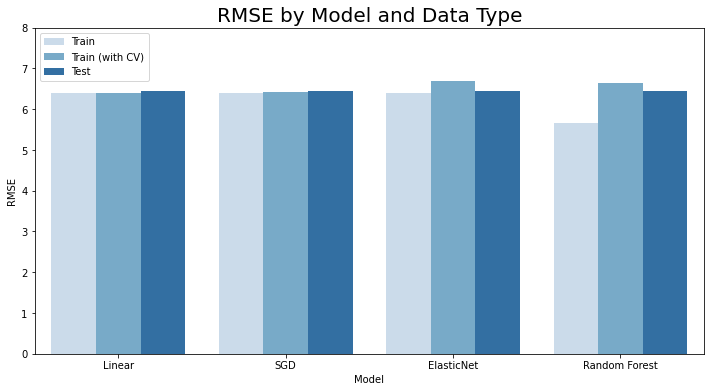

Data Type      Train  Train (with CV)  Test
Model                                      
Random Forest   5.66             6.65  6.44
ElasticNet      6.39             6.68  6.45
Linear          6.39             6.40  6.45
SGD             6.39             6.41  6.45


In [108]:
_ = plt.figure(figsize=(12,6))
_ = sns.barplot(x='Model', y='RMSE', hue='Data Type', data=overall_rmse_df, palette='Blues')
_ = plt.title('RMSE by Model and Data Type', fontsize=20)
_ = plt.legend(loc='upper left')
_ = plt.ylim([0, 8])

plt.show()


print(overall_rmse_df_pivot)

### MAE

In [109]:
model_names = ['Linear', 'SGD', 'ElasticNet', 'Random Forest', 'Linear', 'SGD', 'ElasticNet', 'Random Forest', 'Linear', 'SGD', 'ElasticNet', 'Random Forest']
data_type = ['Train', 'Train', 'Train', 'Train', 'Train (with CV)', 'Train (with CV)', 'Train (with CV)', 'Train (with CV)', 'Test', 'Test', 'Test', 'Test']
model_mae = [round(lm_mae, 2), round(sgd_opt_mae, 2), round(en_opt_mae, 2), round(rf_opt_mae, 2), round(abs(lm_cv_mae_score), 2), round(abs(sgd_opt_cv_mae_score), 2), round(abs(en_opt_cv_mae_score), 2), round(abs(rf_opt_cv_mae_score), 2), round(lm_test_mae, 2), round(sgd_test_mae, 2), round(en_test_mae, 2), round(rf_test_mae, 2)]

In [110]:
overall_mae_df = pd.DataFrame(list(zip(model_names,data_type, model_mae)), columns=['Model', 'Data Type', 'MAE'])

In [111]:
overall_mae_df_pivot = overall_mae_df.pivot(columns='Data Type', values='MAE', index='Model')[['Train', 'Train (with CV)', 'Test']].sort_values(by='Test')

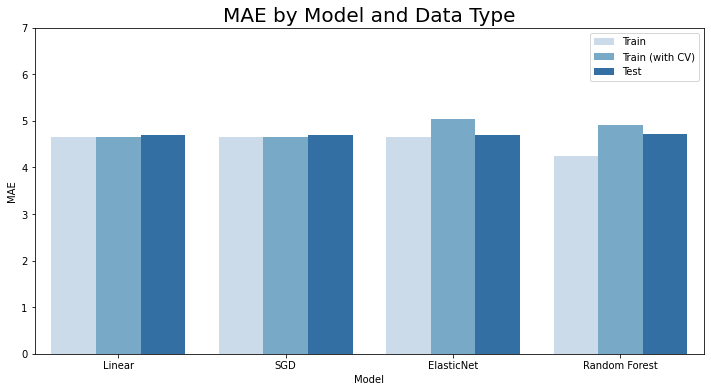

Data Type      Train  Train (with CV)  Test
Model                                      
ElasticNet      4.65             5.03  4.69
Linear          4.65             4.66  4.69
SGD             4.66             4.66  4.69
Random Forest   4.24             4.90  4.71


In [112]:
_ = plt.figure(figsize=(12,6))
_ = sns.barplot(x='Model', y='MAE', hue='Data Type', data=overall_mae_df, palette='Blues')
_ = plt.title('MAE by Model and Data Type', fontsize=20)
_ = plt.legend(loc='upper right')
_ = plt.ylim([0, 7])

plt.show()


print(overall_mae_df_pivot)

### R-squared

In [113]:
model_names = ['Linear', 'SGD', 'ElasticNet', 'Random Forest', 'Linear', 'SGD', 'ElasticNet', 'Random Forest', 'Linear', 'SGD', 'ElasticNet', 'Random Forest']
data_type = ['Train', 'Train', 'Train', 'Train', 'Train (with CV)', 'Train (with CV)', 'Train (with CV)', 'Train (with CV)', 'Test', 'Test', 'Test', 'Test']
model_r2 = [round(lm_r2, 2), round(sgd_opt_r2, 2), round(en_opt_r2, 2), round(rf_opt_r2, 2), round(abs(lm_cv_r2_score), 2), round(abs(sgd_opt_cv_r2_score), 2), round(abs(en_opt_cv_r2_score), 2), round(abs(rf_opt_cv_r2_score), 2), round(lm_test_r2, 2), round(sgd_test_r2, 2), round(en_test_r2, 2), round(rf_test_r2, 2)]

In [114]:
overall_r2_df = pd.DataFrame(list(zip(model_names,data_type, model_r2)), columns=['Model', 'Data Type', 'R2'])

In [115]:
overall_r2_df_pivot = overall_r2_df.pivot(columns='Data Type', values='R2', index='Model')[['Train', 'Train (with CV)', 'Test']].sort_values(by='Test')

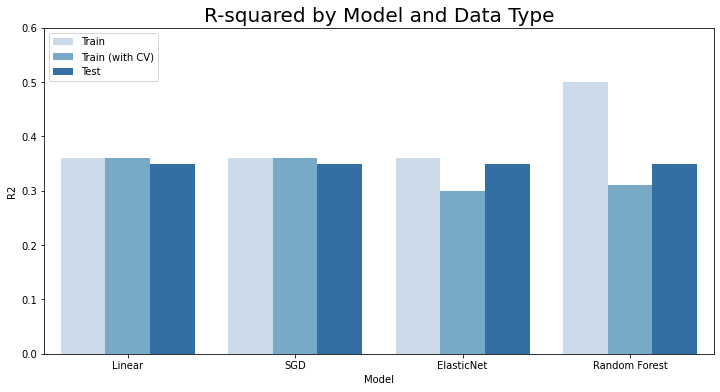

Data Type      Train  Train (with CV)  Test
Model                                      
ElasticNet      0.36             0.30  0.35
Linear          0.36             0.36  0.35
Random Forest   0.50             0.31  0.35
SGD             0.36             0.36  0.35


In [116]:
_ = plt.figure(figsize=(12,6))
_ = sns.barplot(x='Model', y='R2', hue='Data Type', data=overall_r2_df, palette='Blues')
_ = plt.title('R-squared by Model and Data Type', fontsize=20)
_ = plt.legend(loc='upper left')
_ = plt.ylim([0, 0.6])

plt.show()


print(overall_r2_df_pivot)

## Conclusion

The aim of our model was to understand what features could be used to predict future Fantasy Football performance. To acheive this I:
* Identified 19 features that could be used to understand and predict future fantasy football performance (majority of this work was done at EDA and Pre-processing stage to identify best features for this modelling)
* As our target variable was continuous, I looked a 4 different type of regression models:
  1. Linear / OLS Regression
  2. SGD Regressor
  3. ElasticNet
  4. Random Forest Regressor
* For each of these model, I look to tune the hyperparamaters to identify the optimal model for each. 
* For each model, I evaluated their performance using RMSE, MAE and R-squared
* Applying metrics to all training data showed that Random Forest performed best
* Cross-validating the model on the training data showed that our Linear Regression performance best
* On our test data, our Random Forest Regressor performed best on RMSE while other models performed better on MAE.
* Due to the ability of RMSE to penalise outliers better, I am inclined to recommend the Random Forest going forward as the best model for prediction of Fantasy Football performance - althought this is not clear cut. 
* This model:
  * On average, it will predict a player's fantasy performance within +/- 4.71 fantasy points
  * Previous Fantasy performance is the best indicator of future fantasy performance (when looking at a 4-week period)
  * Pass completion, Targets, and Rushing attempts are the next most important features which make sense given they are indicators for each of the key positions on the field - QB, RB, WR/TE 


### Next Steps

The model is a good first step in attempting to understanding what influences Fantasy Performance. However, future studies would like to reduce that margin of error down from a MAE of 4.71 because as all fantasy players know, that one point can be the difference between joy and despair on a given NFL weekend. A couple of options that could be explored would be:
* I used a 4-week rolling average of performance metrics but different week periods could be applied to see how they impact on performance
* Clusters were identified during the EDA of this project and could be used to turn this into a Classification problem to see how accurately you can predict if a player will fit into a particular cluster
* This cluster analysis also identified that I high majority of the dataset produce relatively low scores on a weekly basis and would not be of interest to Fantasy players. Refining the data to exclude players of certain performance level would initially reduce the size of the dataset but may produce more meanignful results for fantasy players.
* New metrics and / or data sources could be included into the analysis to see if these are better predictors (i.e. offensive line performance, QB performance)
* Focus on position level as different metrics are likely to have bigger impact by position. This would again reduce the size of the dataset but could produce more meaningful results.
* Look at different types of regression models (i.e. Support Vector Model) to see how this performs.
* Different approach for feature engineering (i.e. Principal Component Analysis)